In [453]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
import xml.etree.ElementTree as ET
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [341]:
### set display option to max to show all columns
pd.set_option('display.max_columns' , 45)

### connection to database sqlite3
connection = sqlite3.connect('database.sqlite')
cursor = connection.cursor()
cursor.execute("Select name from sqlite_master where type ='table' ;")
tables = cursor.fetchall()
tables

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [342]:
### read table sqlitq_sequence
query ='Select * from sqlite_sequence ;'
table_sequence=pd.read_sql_query(query , connection)
table_sequence

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


# Exploration des tables et le choix des tables et variables 

In [343]:
### read table player_attribute
query_1='Select * from Player_Attributes ; '
table_player_attr=pd.read_sql_query(query_1 , connection)
table_player_attr

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [344]:
### read table PLayer
query_2="""select * from Player; """
table_player=pd.read_sql_query(query_2 , connection)
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [345]:
### merge between table plread_sql_queryayer and player attribute by player_api_id
table_player_sp=table_player[['player_api_id' , 'player_name' , 'birthday' , 'height' , 'weight']]
table_player_sp=pd.merge(table_player_attr , table_player_sp , on ='player_api_id' , how='left')
table_player_sp

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,...,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,...,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,...,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,...,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [346]:
### drop unnecessary columns
table_player_sp=table_player_sp.drop(columns=['player_fifa_api_id' , 'id'])
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [347]:
### read match table
query_3= 'Select * from Match'
table_match=pd.read_sql_query(query_3 , connection)
table_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,...,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
"""feature in table match : explore some columns :
    'goal',
    'shoton',
    'shotoff',
    'foulcommit',
    'card',
    'cross',
    'corner',
    'possession' """
col=table_match.columns.tolist()
col[77:85]

['goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']

In [349]:
###  function extracts structured data from an XML string contained in a DataFrame column. 

def parse_goal_xml(xml_str):
    if xml_str is None:
        return None  
    
    try:
        root = ET.fromstring(xml_str)
    except ET.ParseError:
        return None  
    
    goal_data = {}
    
    goals = root.find('.//goals')
    if goals is not None:
        goal_data['goals'] = goals.text
    shoton = root.find('.//shoton')
    if shoton is not None:
        goal_data['shoton'] = shoton.text
    elapsed = root.find('.//elapsed')
    if elapsed is not None:
        goal_data['elapsed'] = elapsed.text
    player1 = root.find('.//player1')
    if player1 is not None:
        goal_data['player1'] = player1.text
    player2 = root.find('.//player2')
    if player2 is not None:
        goal_data['player2'] = player2.text
    goal_type = root.find('.//goal_type')
    if goal_type is not None:
        goal_data['goal_type'] = goal_type.text
    team = root.find('.//team')
    if team is not None:
        goal_data['team'] = team.text
    
    return goal_data


In [350]:
### explore column goal
liste1 = table_match['goal']  ### XML format

parsed_data = [parse_goal_xml(xml_str) for xml_str in liste1]

# Filter out None values (failed parses) and create a DataFrame from the results
parsed_data = [item for item in parsed_data if item is not None]

df_goal = pd.DataFrame(parsed_data)

df_goal

,goals,shoton,elapsed,player1,player2,goal_type,team
0,1,1,22,37799,38807,n,10261
1,1,1,4,26181,39297,n,9825
2,1,1,83,30853,30889,n,8650
3,1,1,4,23139,36394,n,8654
4,1,1,47,26165,23354,n,10252
...,...,...,...,...,...,...,...
14212,NaN,NaN,41,181211,NaN,o,9931
14213,1,1,4,340790,NaN,n,7896
14214,1,1,35,38601,NaN,n,10179
14215,1,1,19,25843,NaN,n,10192


In [351]:
df_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goals      12903 non-null  object
 1   shoton     12857 non-null  object
 2   elapsed    13224 non-null  object
 3   player1    13215 non-null  object
 4   player2    7647 non-null   object
 5   goal_type  13222 non-null  object
 6   team       13222 non-null  object
dtypes: object(7)
memory usage: 777.6+ KB


In [352]:
### explore data in column possession
liste2 = table_match['possession']  ### XML format

parsed_data = [parse_goal_xml(xml_str) for xml_str in liste2]

# Filter out None values (failed parses) and create a DataFrame from the results
parsed_data = [item for item in parsed_data if item is not None]

df_pos = pd.DataFrame(parsed_data)

df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   elapsed    8419 non-null   object
 1   goal_type  1 non-null      object
dtypes: object(2)
memory usage: 222.3+ KB


In [353]:
### explore data in column foulcommit
list32 = table_match['foulcommit']  ### XML format

parsed_data = [parse_goal_xml(xml_str) for xml_str in liste2]

# Filter out None values (failed parses) and create a DataFrame from the results
parsed_data = [item for item in parsed_data if item is not None]

df_foul = pd.DataFrame(parsed_data)

df_foul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   elapsed    8419 non-null   object
 1   goal_type  1 non-null      object
dtypes: object(2)
memory usage: 222.3+ KB


In [354]:
## explore column shotoff
liste3=table_match['shotoff']
parsed_data = [parse_goal_xml(xml_str) for xml_str in liste3]

# Filtrer les None et créer un DataFrame pandas
parsed_data = [item for item in parsed_data if item is not None]

df_shotoff = pd.DataFrame(parsed_data)

# Afficher le DataFrame
df_shotoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   elapsed  8463 non-null   object
 1   player1  8463 non-null   object
 2   team     8463 non-null   object
dtypes: object(3)
memory usage: 333.3+ KB


In [355]:
### Table_match with importante caracteristique
table_match_sp = table_match[['id' , 'league_id', 'season' , 'date'  , 'match_api_id' , 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal' , 'goal' ]]
table_match_sp

,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,None
1,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,None
2,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,None
3,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,None
4,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,None
25975,25976,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,None
25976,25977,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,None
25977,25978,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,None


In [356]:
### Read table league
query_4='''select * from League'''
table_league=pd.read_sql_query(query_4 , connection)
table_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [357]:
### read table country
query_5="""select * from Country"""
table_country=pd.read_sql_query(query_5 , connection)
table_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [358]:
### merge table league and country by id
table_Lea_Con = pd.merge(table_league , table_country , on='id' , how='left')
table_Lea_Con=table_Lea_Con.drop(['id'] , axis=1)
table_Lea_Con=table_Lea_Con.rename(columns={'name_x' : 'League' , 'name_y' : 'Country'})
table_Lea_Con

,country_id,League,Country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [359]:
### read table team
query_6='select * from Team'
table_team=pd.read_sql_query(query_6 , connection)
table_team


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [360]:
### read table team attribute
query_7='''select* from Team_Attributes'''
table_team_att=pd.read_sql_query(query_7 , connection)
table_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [361]:
### merge table team and team attribute
table_team=table_team[['team_api_id' , 'team_long_name' , 'team_short_name']]
table_team_sp = pd.merge(table_team_att , table_team , on='team_api_id' , how='left')
table_team_sp=table_team_sp.drop(['team_fifa_api_id'] , axis=1)
table_team_sp

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1454,1455,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1455,1456,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL
1456,1457,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL


### Choix final du table

In [362]:
### Player table 
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [363]:
### match table 
table_match_sp

,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,None
1,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,None
2,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,None
3,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,None
4,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,None
25975,25976,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,None
25976,25977,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,None
25977,25978,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,None


In [364]:
## table league
table_Lea_Con

,country_id,League,Country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [365]:
### table team
table_team_sp

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1454,1455,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1455,1456,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL
1456,1457,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL


# Exploration analytics et  nettoyage du table 

### Table player_sp

In [366]:
table_player_sp.info()  ### table player exploration 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   date                 183978 non-null  object 
 2   overall_rating       183142 non-null  float64
 3   potential            183142 non-null  float64
 4   preferred_foot       183142 non-null  object 
 5   attacking_work_rate  180748 non-null  object 
 6   defensive_work_rate  183142 non-null  object 
 7   crossing             183142 non-null  float64
 8   finishing            183142 non-null  float64
 9   heading_accuracy     183142 non-null  float64
 10  short_passing        183142 non-null  float64
 11  volleys              181265 non-null  float64
 12  dribbling            183142 non-null  float64
 13  curve                181265 non-null  float64
 14  free_kick_accuracy   183142 non-null  float64
 15  long_passing     

In [367]:
#### Change date type  
table_player_sp['date']=pd.to_datetime(table_player_sp['date'] , errors='raise')
table_player_sp['birthday']=pd.to_datetime(table_player_sp['birthday'] , errors='raise')

In [368]:
### fill null value in table player
table_player_na=table_player_sp[table_player_sp.isna().any(axis=1)] ### filtre player table if one null value is in any column
liste_pl_api=table_player_na['player_api_id'].tolist() ### extract player api
attributes=table_player_sp.columns.tolist() ### extract cilumn name

In [369]:
def fill_missing_values(df, attributes, player_ids):
    for player_id in player_ids:
        for attribute in attributes:
            if df[attribute].isna().any():
                if attribute in ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']:
                    # mode for categorical variables,
                    mode_value = df[attribute].mode()[0] 
                    df[attribute] = np.where(
                        (df[attribute].isna()) & (df['player_api_id'] == player_id), mode_value, df[attribute]
                    )
                else:
                    # mean for numeric variables
                    mean_value = df[attribute].mean()
                    df[attribute] = np.where(
                        (df[attribute].isna()) & (df['player_api_id'] == player_id), mean_value, df[attribute]
                    )
    return df

In [370]:
table_player_sp = fill_missing_values(table_player_sp, attributes, liste_pl_api)

In [371]:
table_player_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_api_id        183978 non-null  int64         
 1   date                 183978 non-null  datetime64[ns]
 2   overall_rating       183978 non-null  float64       
 3   potential            183978 non-null  float64       
 4   preferred_foot       183978 non-null  object        
 5   attacking_work_rate  183978 non-null  object        
 6   defensive_work_rate  183978 non-null  object        
 7   crossing             183978 non-null  float64       
 8   finishing            183978 non-null  float64       
 9   heading_accuracy     183978 non-null  float64       
 10  short_passing        183978 non-null  float64       
 11  volleys              183978 non-null  float64       
 12  dribbling            183978 non-null  float64       
 13  curve         

### Table match_sp

In [372]:
table_match_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   league_id         25979 non-null  int64 
 2   season            25979 non-null  object
 3   date              25979 non-null  object
 4   match_api_id      25979 non-null  int64 
 5   home_team_api_id  25979 non-null  int64 
 6   away_team_api_id  25979 non-null  int64 
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
 9   goal              14217 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.0+ MB


In [373]:
liste1 = table_match_sp['goal'].tolist()
match_ids = table_match_sp['match_api_id'].tolist()  ### extract match ids

In [374]:
### extract goal data from table match
df_goal_non_nan = table_match.dropna(subset='goal')


def parse_goals_to_table(df_goal):
    
    all_goal_data = []

    for i,xml_data in enumerate(df_goal['goal']):
        
        if pd.notnull(xml_data):
            x = df_goal.index[i]
            y= df_goal['season'][x]
                        
            root = ET.fromstring(xml_data)
            
            for value in root.findall('value'):
                goal_info = {
                    'season':y,
                    'match_api_id':x,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                }
                
                all_goal_data.append(goal_info)

    return pd.DataFrame(all_goal_data)


df_goal= parse_goals_to_table(df_goal_non_nan)

df_goal

,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [375]:
### change date type
table_match_sp['date']=pd.to_datetime(table_match_sp['date'] , errors='raise')

/tmp/ipykernel_30141/2074561594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_match_sp['date']=pd.to_datetime(table_match_sp['date'] , errors='raise')


In [376]:
table_match_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   league_id         25979 non-null  int64         
 2   season            25979 non-null  object        
 3   date              25979 non-null  datetime64[ns]
 4   match_api_id      25979 non-null  int64         
 5   home_team_api_id  25979 non-null  int64         
 6   away_team_api_id  25979 non-null  int64         
 7   home_team_goal    25979 non-null  int64         
 8   away_team_goal    25979 non-null  int64         
 9   goal              14217 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.0+ MB


### Table team_sp

In [377]:
table_team_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

In [378]:
### change date type
table_team_sp['date']=pd.to_datetime(table_team_sp['date']  , errors='raise')

In [379]:
### fill null value in columns build Up Play Dribbling Class
table_team_sp['buildUpPlayDribblingClass'].unique()

array(['Little', 'Normal', 'Lots'], dtype=object)

In [380]:
### explore where is the null value in buildUpPlayDribbling
col=list(table_team_sp['buildUpPlayDribblingClass'].unique())
for st in col : 
    data=table_team_sp[table_team_sp['buildUpPlayDribblingClass']==st]
    miss_value=len(data['buildUpPlayDribbling'])-len(data[~data['buildUpPlayDribbling'].isna()])
    print(f"numbre of mising data in {st} is :" ,  miss_value)


numbre of mising data in Little is : 969
numbre of mising data in Normal is : 0
numbre of mising data in Lots is : 0


In [381]:
### describe of interval of little build up play dribbling
little_data=table_team_sp[table_team_sp['buildUpPlayDribblingClass']=='Little']
little_data['buildUpPlayDribbling'].describe()

count    35.000000
mean     30.485714
std       2.489642
min      24.000000
25%      29.000000
50%      32.000000
75%      32.000000
max      33.000000
Name: buildUpPlayDribbling, dtype: float64

In [382]:
### fill nan value
table_team_sp['buildUpPlayDribbling']=np.where(
    (table_team_sp['buildUpPlayDribbling'].isna()) & (table_team_sp['buildUpPlayDribblingClass']=='Little'),
    np.random.randint(24, 34, size=table_team_sp.shape[0]), 
    table_team_sp['buildUpPlayDribbling']
)

In [383]:
table_team_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_api_id                     1458 non-null   int64         
 2   date                            1458 non-null   datetime64[ns]
 3   buildUpPlaySpeed                1458 non-null   int64         
 4   buildUpPlaySpeedClass           1458 non-null   object        
 5   buildUpPlayDribbling            1458 non-null   float64       
 6   buildUpPlayDribblingClass       1458 non-null   object        
 7   buildUpPlayPassing              1458 non-null   int64         
 8   buildUpPlayPassingClass         1458 non-null   object        
 9   buildUpPlayPositioningClass     1458 non-null   object        
 10  chanceCreationPassing           1458 non-null   int64         
 11  chan

# Analyse descriptive

In [384]:
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05,180.34,176
183974,39902,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05,180.34,176
183975,39902,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05,180.34,176
183976,39902,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05,180.34,176


In [385]:
### grouping overall_rating by player and date 
overall_rating_per_s = table_player_sp.groupby(['player_name' , table_player_sp['date'].dt.year])['overall_rating'].mean().reset_index()
overall_rating_per_s = overall_rating_per_s.sort_values(by=['overall_rating' , 'date'] , ascending=[False , True])
overall_rating_per_s

,player_name,date,overall_rating
40182,Lionel Messi,2012,94.000000
40183,Lionel Messi,2013,94.000000
40185,Lionel Messi,2015,93.428571
40184,Lionel Messi,2014,93.333333
13027,Cristiano Ronaldo,2015,92.600000
...,...,...,...
51416,Nick Blackman,2007,36.000000
29928,James Vincent,2007,35.000000
51646,Nicola Madonna,2007,35.000000
29929,James Vincent,2008,35.000000


In [386]:
### top player by overrating
top_rating_player=overall_rating_per_s.sort_values(by='overall_rating'  , ascending=False).drop_duplicates(subset='player_name').head(10)

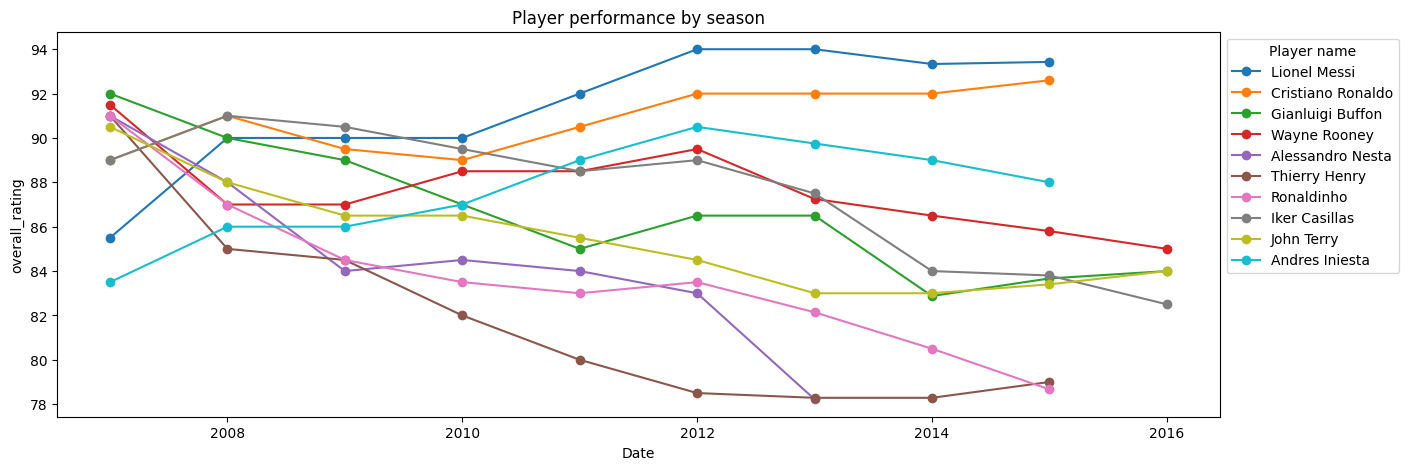

In [387]:
#### visualisation of players by overtaing of each season
plt.figure(figsize=(15,5))

for player in top_rating_player['player_name']:
    player_data=overall_rating_per_s[overall_rating_per_s['player_name']==player].sort_values(by='date' , ascending = True)
    plt.plot(player_data['date'] , player_data['overall_rating'] , label=player , marker='o')

plt.title('Player performance by season')
plt.xlabel('Date')
plt.ylabel('overall_rating')
plt.legend(title='Player name' , bbox_to_anchor=(1,1))
plt.show()

In [388]:
### group potential by player_name and date
potential_per_s = table_player_sp.groupby(['player_name' , table_player_sp['date'].dt.year])['potential'].mean().reset_index()
potential_per_s

,player_name,date,potential
0,Aaron Appindangoye,2007,65.000000
1,Aaron Appindangoye,2015,67.333333
2,Aaron Appindangoye,2016,71.000000
3,Aaron Cresswell,2007,60.000000
4,Aaron Cresswell,2008,60.000000
...,...,...,...
72015,de Oliveira Cleber Monteiro,2011,69.500000
72016,de Oliveira Cleber Monteiro,2012,62.000000
72017,dos Santos Fabio Junior,2007,72.000000
72018,dos Santos Fabio Junior,2010,73.000000


In [389]:
## top player by potential
top_pot_player = potential_per_s.sort_values(by='potential', ascending=False).drop_duplicates(subset='player_name').head(10)
top_pot_player

,player_name,date,potential
40183,Lionel Messi,2013,97.0
13025,Cristiano Ronaldo,2013,94.6
51360,Neymar,2016,94.0
59894,Ronaldinho,2007,94.0
15898,David Villa,2008,93.0
29898,James Rodriguez,2016,93.0
24915,Gianluigi Buffon,2007,93.0
4821,Andres Iniesta,2012,93.0
4537,Andrea Pirlo,2008,93.0
3142,Alexandre Pato,2007,93.0


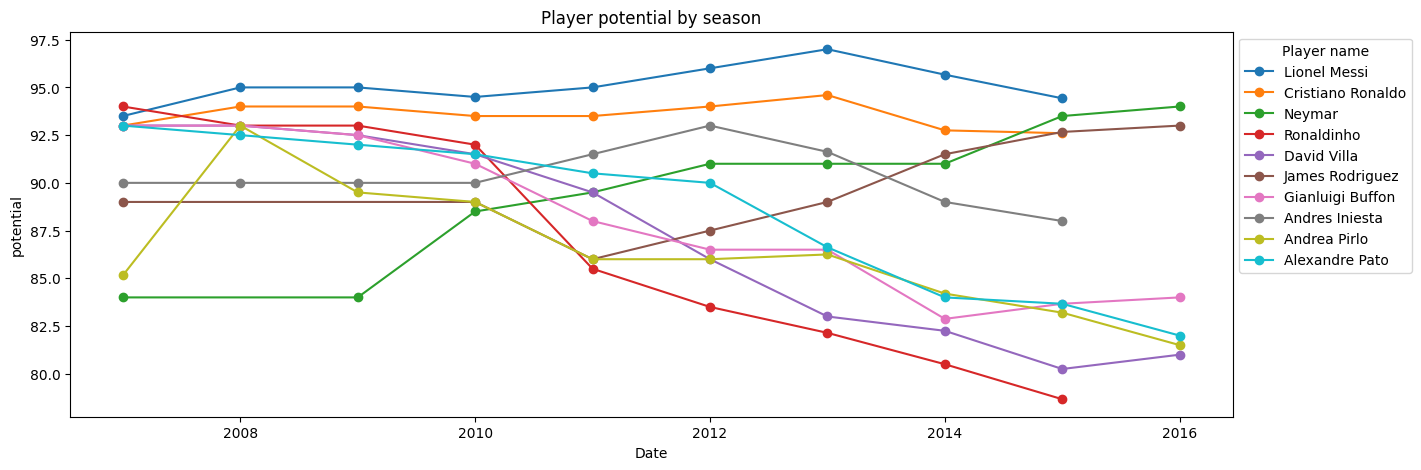

In [390]:
### visualize potentail player by potential for each season 
plt.figure(figsize=(15 , 5))

for player in top_pot_player['player_name'] : 
    player_data = potential_per_s[potential_per_s['player_name']==player].sort_values(by='date' , ascending=True)
    plt.plot(player_data['date'] , player_data['potential'] , marker='o' , label=player)

plt.title('Player potential by season')
plt.xlabel('Date')
plt.ylabel('potential')
plt.legend(title='Player name' , bbox_to_anchor=(1,1))
plt.show()


In [391]:
### group overrating by playername and date
overall_rating_per_day=table_player_sp.groupby(['player_name' , table_player_sp['date']])['overall_rating'].value_counts().reset_index()
overall_rating_per_day

,player_name,date,overall_rating,count
0,Aaron Appindangoye,2007-02-22,61.0,1
1,Aaron Appindangoye,2015-03-20,61.0,1
2,Aaron Appindangoye,2015-09-21,62.0,1
3,Aaron Appindangoye,2015-11-19,67.0,1
4,Aaron Appindangoye,2016-02-18,67.0,1
...,...,...,...,...
183901,de Oliveira Cleber Monteiro,2012-02-22,62.0,1
183902,dos Santos Fabio Junior,2007-02-22,64.0,1
183903,dos Santos Fabio Junior,2010-02-22,64.0,1
183904,dos Santos Fabio Junior,2010-08-30,69.0,1


In [392]:
### constant player by overrating
player_cons=overall_rating_per_day.groupby('player_name')['overall_rating'].agg(['std' , 'mean' , 'count']).reset_index()
player_cons.rename(columns={'std' : 'std_dev' , 'mean' : 'avg_rating' , 'count' : 'match_played'} , inplace=True)
most_player_cons = player_cons.sort_values(by=['match_played','std_dev'] ,  ascending=[False , True])
most_player_cons

,player_name,std_dev,avg_rating,match_played
2168,Danilo,5.807497,73.666038,106
396,Alex,6.854273,73.102914,103
2726,Douglas,3.822912,71.101124,89
3210,Felipe,3.740853,72.511628,86
8705,Ricardo,5.326314,70.100000,80
...,...,...,...,...
10683,Yasin Karaca,0.000000,61.000000,2
10691,Yaw Yeboah,0.000000,63.000000,2
10693,Yaya Boumediene,0.000000,65.000000,2
10738,Yoshito Okubo,0.000000,71.000000,2


In [393]:
top_player_con=most_player_cons.head(20) ### top 20 player

/tmp/ipykernel_30141/3004521320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')


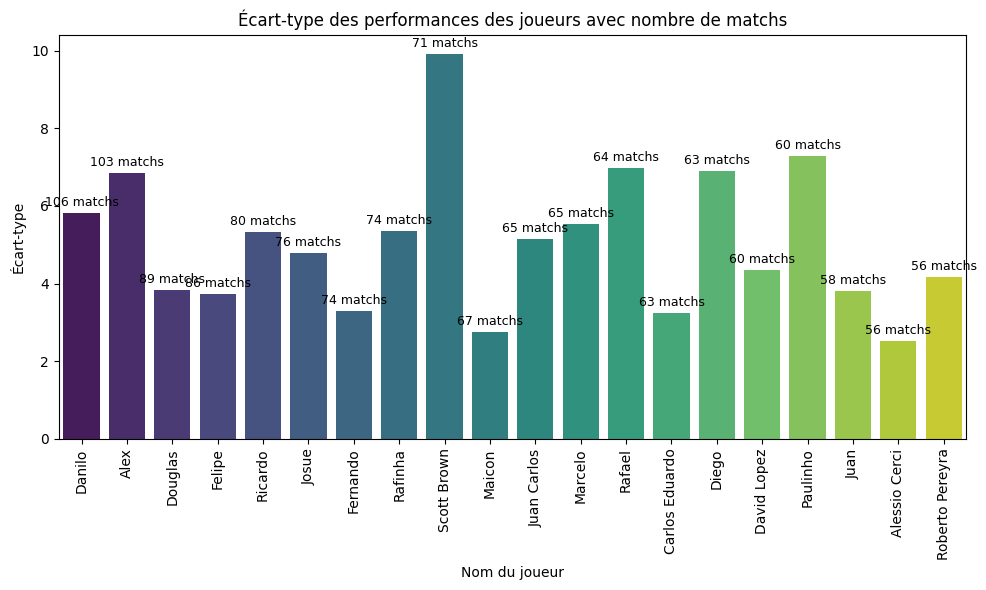

In [394]:
### visualisation of top 15 non constant player by matched play
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')

for i, row in enumerate(top_player_con.itertuples()):
    ax.annotate(f"{row.match_played} matchs",
                xy=(i, row.std_dev), 
                xytext=(0, 5),  
                textcoords='offset points',
                ha='center', fontsize=9, color='black')

plt.xticks(rotation=90)
plt.title('Écart-type des performances des joueurs avec nombre de matchs')
plt.xlabel('Nom du joueur')
plt.ylabel('Écart-type')
plt.tight_layout()
plt.show()


In [395]:
# Define the independent (X) and dependent (y) variables
X = most_player_cons['match_played']
y = most_player_cons['std_dev']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                std_dev   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1732.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:04:57   Log-Likelihood:                -21777.
No. Observations:               10848   AIC:                         4.356e+04
Df Residuals:                   10846   BIC:                         4.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7837      0.034     51.960   

##### interpretation
##### match_played: 0.0730 (p-value = 0.000) The coefficient for match_played is 0.0730, and the p-value is also 0.000, indicating that match_played is a statistically significant predictor of std_dev. This suggests that for every additional match played, the standard deviation of the player’s performance increases by approximately 0.073 units.

In [396]:
### exploration of goal dataframe
df_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        39980 non-null  object
 1   match_api_id  39980 non-null  int64 
 2   goals         35229 non-null  object
 3   shoton        34548 non-null  object
 4   elapsed       39980 non-null  object
 5   player1       39863 non-null  object
 6   player2       17069 non-null  object
 7   subtype       21551 non-null  object
 8   team          39946 non-null  object
 9   goal_type     39946 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [397]:
### drop row if player1 inforamtion in null 
df_goal=df_goal.dropna(subset=('player1'))
df_goal['player1']=df_goal['player1'].astype(int)
df_goal['player2'].fillna(0, inplace=True) ## fill player2 by 0 
df_goal['player2']=df_goal['player2'].astype(int)

/tmp/ipykernel_30141/1092596955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goal['player1']=df_goal['player1'].astype(int)
/tmp/ipykernel_30141/1092596955.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goal['player2'].fillna(0, inplace=True) ## fill player2 by 0
/tmp/i

In [398]:
### change date type 
df_goal['goals']=pd.to_numeric(df_goal['goals'] , errors='coerce')
df_goal['goals'].fillna(1, inplace=True) ### fill goal by 1 is player1 column existe

/tmp/ipykernel_30141/2014629185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goal['goals']=pd.to_numeric(df_goal['goals'] , errors='coerce')
/tmp/ipykernel_30141/2014629185.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goal['goals'].fillna(1, inplace=True) ### fill goa

In [399]:
### merge table df goal and table player by player_api_id for have table wioth player name column
df_goal = df_goal.merge(table_player[['player_api_id', 'player_name']], 
                        left_on='player1', 
                        right_on='player_api_id', 
                        how='left')
df_goal.rename(columns={'player_name': 'player_contribution'}, inplace=True)

df_goal = df_goal.merge(table_player[['player_api_id', 'player_name']], 
                        left_on='player2', 
                        right_on='player_api_id', 
                        how='left')

df_goal.rename(columns={'player_name': 'player_ass'}, inplace=True)

df_goal.drop(columns=['player_api_id_x', 'player_api_id_y' , 'player1' , 'player2'], inplace=True)


In [400]:
df_goal['season']=df_goal['season'].apply(lambda x : int(x.split('/')[0])) ### extract year of seaason

In [401]:
### group numbre of goal by player
most_players_goal = df_goal.groupby(['player_contribution' , 'season'])['goals'].sum().reset_index()
most_players_goal = most_players_goal.sort_values(by=['season','goals'] , ascending=[True , False])
most_players_goal

,player_contribution,season,goals
9006,Samuel Eto'o,2008,33.0
2602,Diego Forlan,2008,32.0
2435,David Villa,2008,30.0
3934,Grafite,2008,28.0
2629,Diego Milito,2008,27.0
...,...,...,...
10520,Youssef El Jebli,2015,1.0
10542,Yuya Osako,2015,1.0
10543,Zakaria Bakkali,2015,1.0
10571,Zinedine Machach,2015,1.0


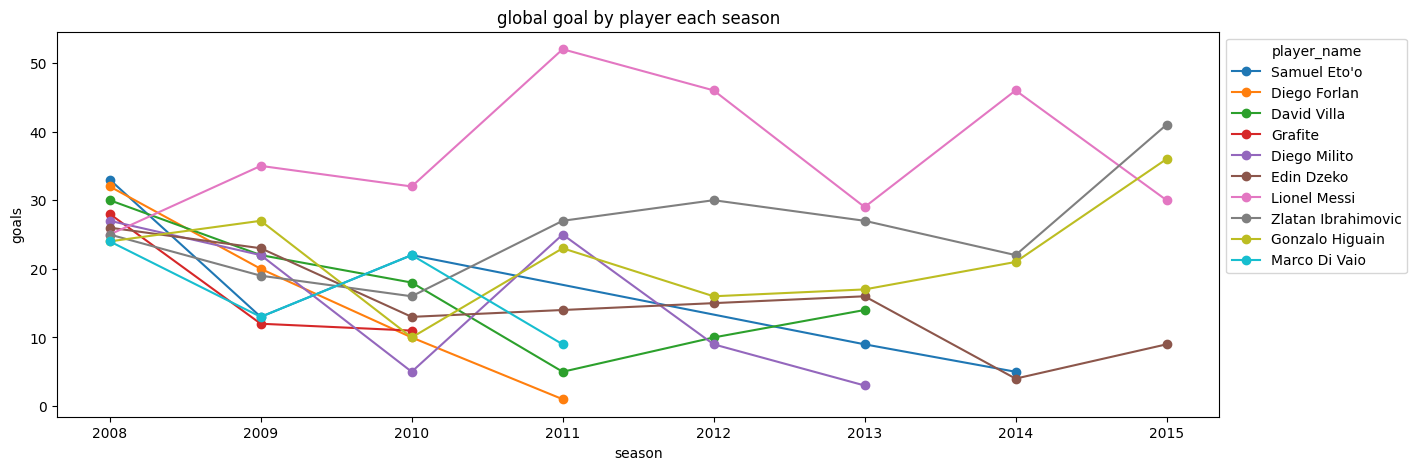

In [402]:
### visualise global goal by player each season
plt.figure(figsize=(15,5))
player_cont=list(most_players_goal['player_contribution'].unique())
for player in player_cont[:10]:
    player_data=most_players_goal[most_players_goal['player_contribution']==player].sort_values(by='season' , ascending=True)
    plt.plot(player_data['season'] , player_data['goals'] , marker='o' , label=player)

plt.title('global goal by player each season')
plt.xlabel('season')
plt.ylabel('goals')
plt.legend(title='player_name' , bbox_to_anchor=(1,1))
plt.show()

In [403]:
### drop columns from table match
table_match_sp=table_match_sp.drop(columns=(['season' , 'id' , 'goal']))

In [404]:
### add player name inforamtion to table match 
table_match_sp = table_match_sp.merge(table_team[['team_api_id', 'team_long_name']], 
                        left_on='home_team_api_id', 
                        right_on='team_api_id', 
                        how='left')


table_match_sp = table_match_sp.merge(table_team[['team_api_id', 'team_long_name']], 
                        left_on='away_team_api_id', 
                        right_on='team_api_id', 
                        how='left')

table_match_sp.rename(columns={'team_long_name_x': 'home_team'}, inplace=True)

table_match_sp.rename(columns={'team_long_name_y': 'away_team'}, inplace=True)

table_match_sp.drop(columns=['team_api_id_x', 'team_api_id_y' , 'away_team_api_id' , 'home_team_api_id'], inplace=True)


In [405]:
table_match_sp

,league_id,date,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,1,2008-08-17,492473,1,1,KRC Genk,Beerschot AC
1,1,2008-08-16,492474,0,0,SV Zulte-Waregem,Sporting Lokeren
2,1,2008-08-16,492475,0,3,KSV Cercle Brugge,RSC Anderlecht
3,1,2008-08-17,492476,5,0,KAA Gent,RAEC Mons
4,1,2008-08-16,492477,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...
25974,24558,2015-09-22,1992091,1,0,FC St. Gallen,FC Thun
25975,24558,2015-09-23,1992092,1,2,FC Vaduz,FC Luzern
25976,24558,2015-09-23,1992093,2,0,Grasshopper Club Zürich,FC Sion
25977,24558,2015-09-22,1992094,0,0,Lugano,FC Zürich


In [406]:
### total goal scored and recieve for each team
top_team_goal = table_match_sp.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_rec = table_match_sp.groupby('away_team')['away_team_goal'].sum().reset_index()
top_team_goal=top_team_goal.sort_values(by='home_team_goal' , ascending=False)
top_team_rec=top_team_rec.sort_values(by='away_team_goal' , ascending=False)

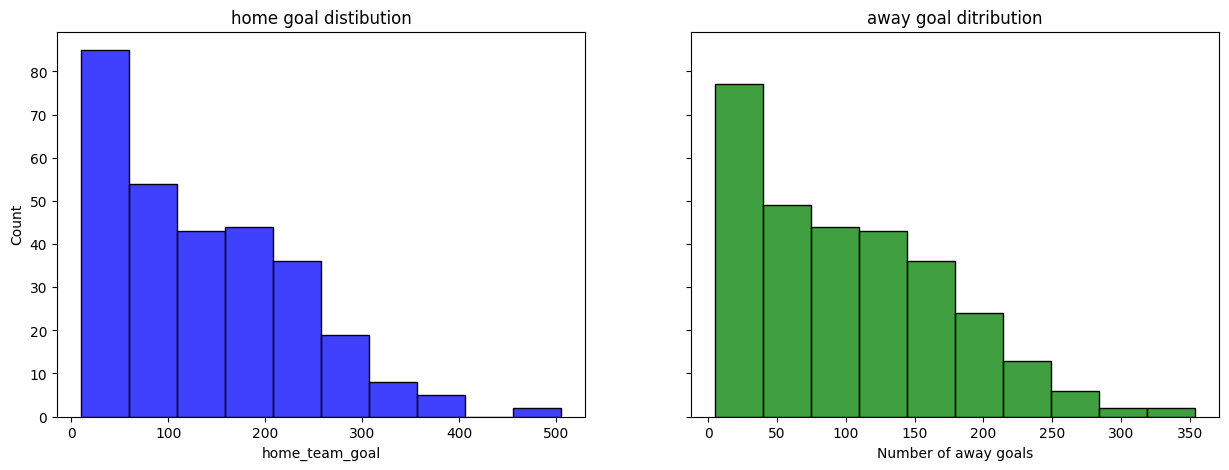

In [407]:
### visualize la distribution of goals
fig , axes = plt.subplots(1 , 2 , figsize=(15,5) , sharey=True)

sns.histplot(top_team_goal['home_team_goal'], ax=axes[0],  bins=10, color='blue', edgecolor='black')
plt.xlabel('Number of home goals')
axes[0].set_title('home goal distibution')

sns.histplot(top_team_rec['away_team_goal'], ax=axes[1], bins=10, color='green', edgecolor='black')
plt.xlabel('Number of away goals')
axes[1].set_title('away goal ditribution')

plt.show()


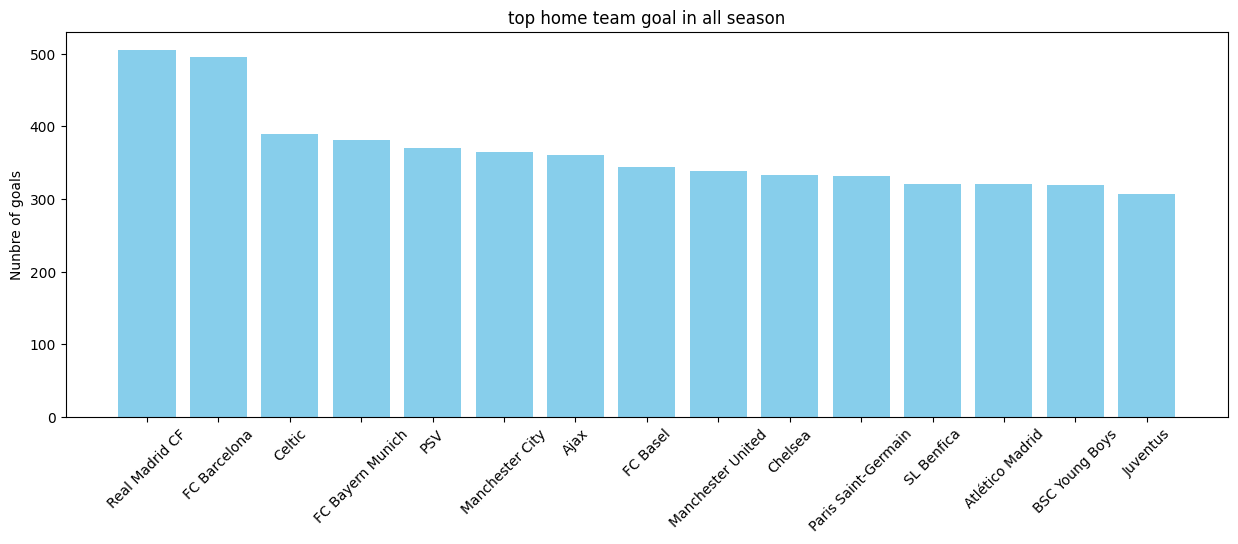

In [408]:
### visualie top team by goals 
plt.figure(figsize=(15,5))
plt.bar(top_team_goal['home_team'].head(15) , top_team_goal['home_team_goal'].head(15) , color='skyblue')
plt.title('top home team goal in all season')
plt.ylabel('Nunbre of goals')
plt.xticks(rotation=45)
plt.show()


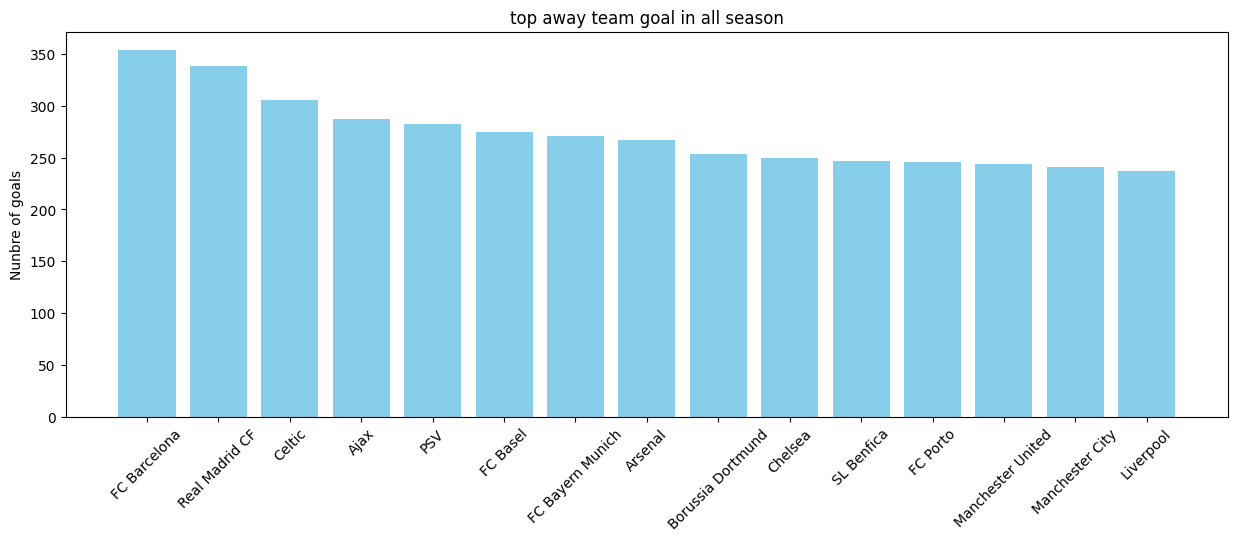

In [409]:
plt.figure(figsize=(15,5))
plt.bar(top_team_rec['away_team'].head(15) , top_team_rec['away_team_goal'].head(15) , color='skyblue')
plt.title('top away team goal in all season')
plt.ylabel('Nunbre of goals')
plt.xticks(rotation=45)
plt.show()


In [410]:
#### top geal team per season
top_team_goal_sea = table_match_sp.groupby(['home_team' , table_match_sp['date'].dt.year])['home_team_goal'].sum().reset_index()
top_team_rec_sea= table_match_sp.groupby(['away_team' , table_match_sp['date'].dt.year])['away_team_goal'].sum().reset_index()
top_team_goal_sea=top_team_goal_sea.sort_values(by=['date' , 'home_team_goal'] , ascending=[True , False])
top_team_goal_sea

,home_team,date,home_team_goal
440,FC Barcelona,2008,28
1267,RSC Anderlecht,2008,28
1452,SV Werder Bremen,2008,27
1281,Rangers,2008,26
1302,Real Madrid CF,2008,25
...,...,...,...
1803,Willem II,2016,3
1843,Śląsk Wrocław,2016,3
1209,Polonia Bytom,2016,2
1411,SC Cambuur,2016,2


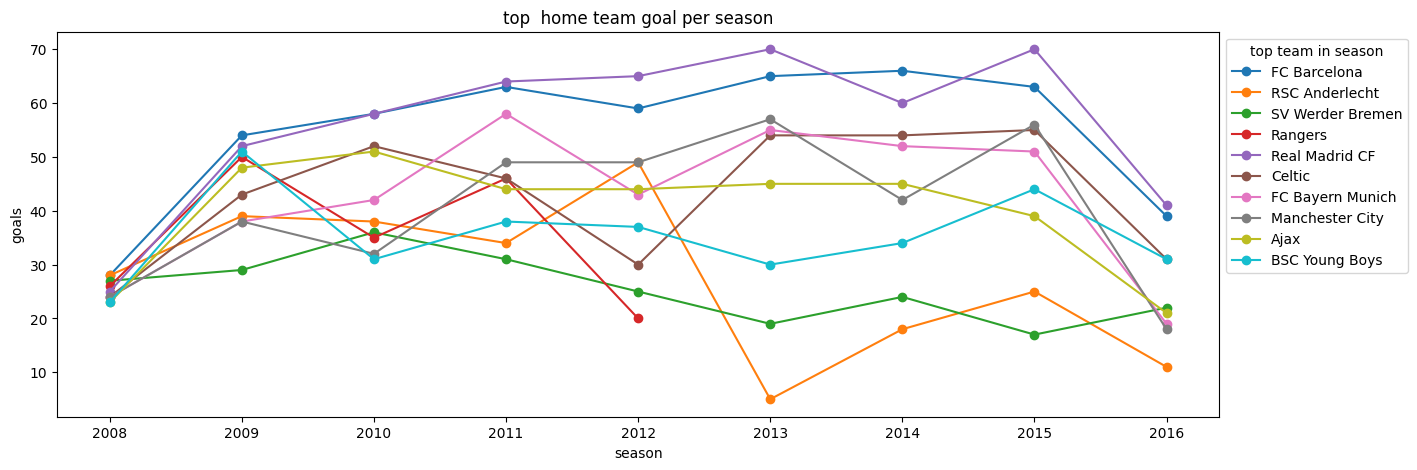

In [411]:
plt.figure(figsize=(15,5))
liste1=list(top_team_goal_sea['home_team'].unique())
for team in liste1 [:10]: 
    data_tema = top_team_goal_sea[top_team_goal_sea['home_team']==team].sort_values(by='date' , ascending=True)
    plt.plot(data_tema['date'],   data_tema['home_team_goal']  , marker='o', label=team)

plt.title('top  home team goal per season')
plt.xlabel('season')
plt.ylabel('goals')
plt.legend(title='top team in season' , bbox_to_anchor=(1,1))

In [412]:
### merge table by match_api_id
goal_Res = pd.merge(df_goal[['match_api_id']] , 
                    table_match_sp[['match_api_id' , 'home_team_goal' ,'away_team_goal' , 'home_team' , 'away_team']] , 
                    on='match_api_id' , how='right')

goal_Res

,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,492473,1,1,KRC Genk,Beerschot AC
1,492474,0,0,SV Zulte-Waregem,Sporting Lokeren
2,492475,0,3,KSV Cercle Brugge,RSC Anderlecht
3,492476,5,0,KAA Gent,RAEC Mons
4,492477,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...
25974,1992091,1,0,FC St. Gallen,FC Thun
25975,1992092,1,2,FC Vaduz,FC Luzern
25976,1992093,2,0,Grasshopper Club Zürich,FC Sion
25977,1992094,0,0,Lugano,FC Zürich


In [413]:
### total goal in home 
top_team_home_goal=goal_Res.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='home_team_goal' , ascending=False)

,home_team,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
...,...,...
5,AC Arles-Avignon,14
264,Trofense,14
103,Feirense,13
56,Córdoba CF,12


In [414]:
### total goal in away
top_team_home_goal=goal_Res.groupby('away_team')['away_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='away_team_goal' , ascending=False)

,away_team,away_team_goal
75,FC Barcelona,354
211,Real Madrid CF,338
49,Celtic,306
15,Ajax,287
184,PSV,282
...,...,...
78,FC Dordrecht,9
270,Uniao da Madeira,8
5,AC Arles-Avignon,7
216,Reggio Calabria,7


In [415]:
### reception home goal
top_team_home_res=goal_Res.groupby('away_team')['home_team_goal'].sum().reset_index()
top_team_home_res.sort_values(by='home_team_goal' , ascending=False)

,away_team,home_team_goal
112,Getafe CF,278
125,Heracles Almelo,272
122,Hannover 96,270
7,ADO Den Haag,268
235,SV Werder Bremen,268
...,...,...
234,SV Darmstadt 98,24
259,Termalica Bruk-Bet Nieciecza,24
17,Angers SCO,23
16,Amadora,23


In [416]:
### recpetion in away goal
top_team_away_res=goal_Res.groupby('home_team')['away_team_goal'].sum().reset_index()
top_team_away_res.sort_values(by='away_team_goal' , ascending=False)

,home_team,away_team_goal
144,Kilmarnock,238
235,SV Werder Bremen,203
229,SC Heerenveen,202
167,Motherwell,201
7,ADO Den Haag,200
...,...,...
81,FC Ingolstadt 04,18
267,UD Las Palmas,17
270,Uniao da Madeira,17
16,Amadora,15


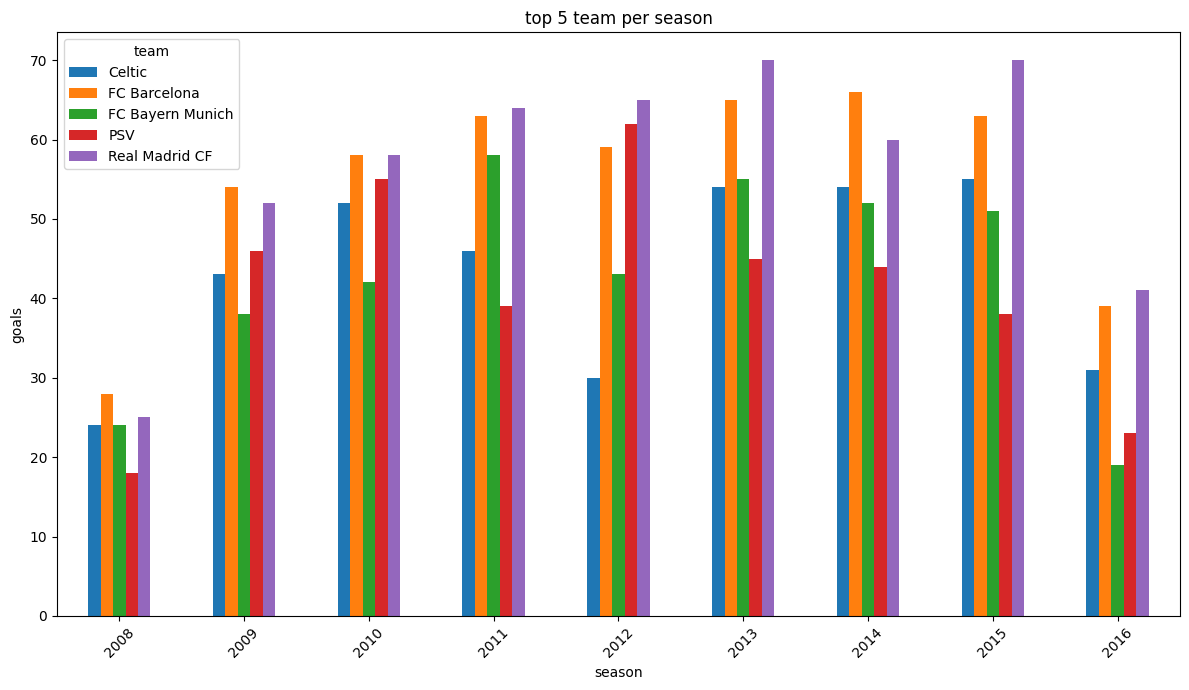

In [417]:
###top 5 team per season
top_team = top_team_goal['home_team'].head(5)

top_team_goal_sea_filtered = top_team_goal_sea[top_team_goal_sea['home_team'].isin(top_team)]
team_performance = top_team_goal_sea_filtered.groupby(['date', 'home_team'])['home_team_goal'].sum().unstack(fill_value=0)

team_performance.plot(kind='bar', figsize=(12, 7))
plt.xlabel('season')
plt.ylabel('goals')
plt.title('top 5 team per season')
plt.xticks(rotation=45)
plt.legend(title='team')

plt.tight_layout()
plt.show()


/tmp/ipykernel_30141/2231367039.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_teams_per_year = top_team_goal_sea.groupby('date').apply(lambda x: x.nlargest(10, 'home_team_goal')).reset_index(drop=True)


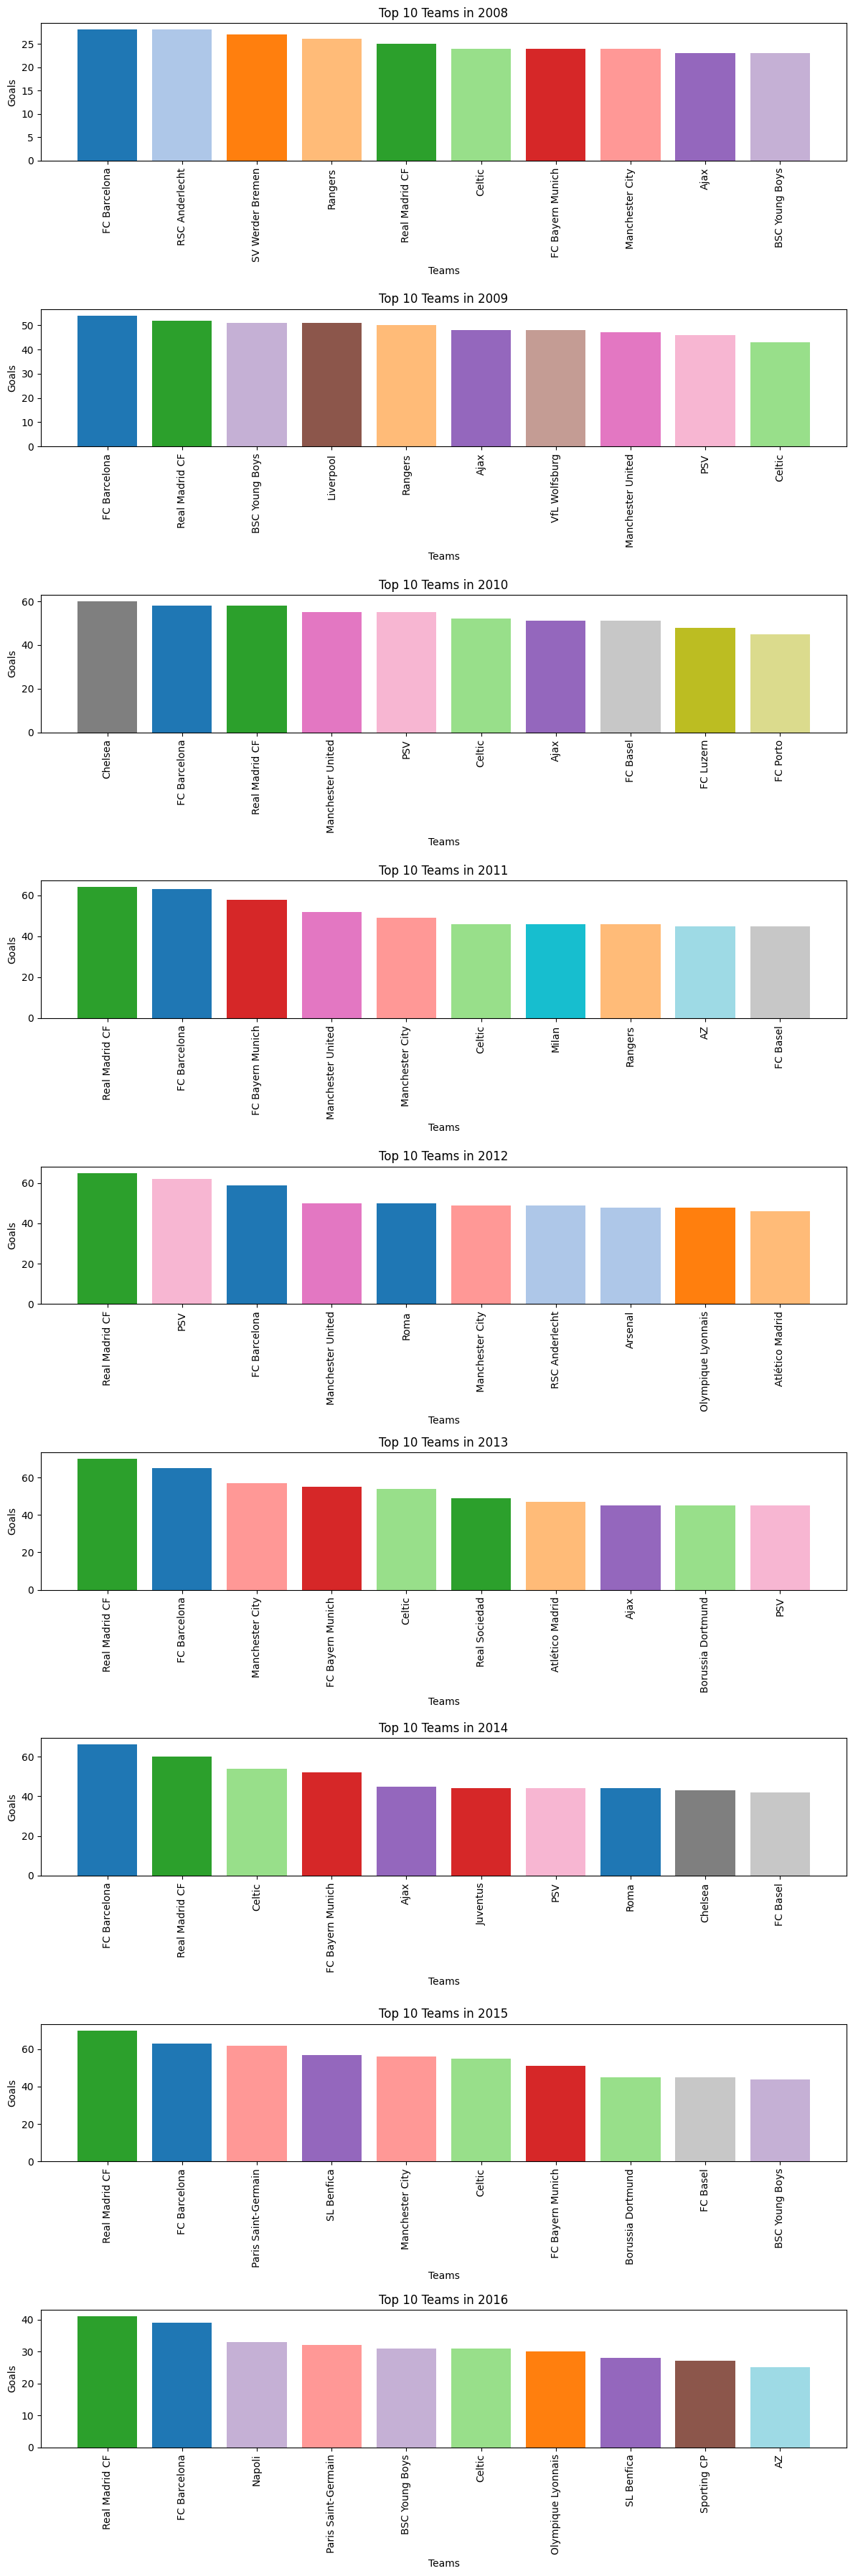

In [418]:
#### visualise top team each season by home goal
top_teams_per_year = top_team_goal_sea.groupby('date').apply(lambda x: x.nlargest(10, 'home_team_goal')).reset_index(drop=True)

unique_years = top_teams_per_year['date'].unique()
unique_teams = top_teams_per_year['home_team'].unique()

# Assign a unique color to each team
cmap = colormaps['tab20']
team_colors = {team: cmap(i % 20) for i, team in enumerate(unique_teams)}  


fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, len(unique_years) * 4))

# Plot data for each year
for ax, year in zip(axes, unique_years):
    year_data = top_teams_per_year[top_teams_per_year['date'] == year]
    colors = [team_colors[team] for team in year_data['home_team']]  # Map colors to teams
    
    bars = ax.bar(year_data['home_team'], year_data['home_team_goal'], color=colors)
    
    ax.set_title(f'Top 10 Teams in {year}')
    ax.set_ylabel('Goals')
    ax.set_xlabel('Teams')
    
    
    ax.set_xticks(range(len(year_data['home_team'])))  
    ax.set_xticklabels(year_data['home_team'], rotation=90) 

plt.tight_layout()
plt.show()


### clustring

In [419]:
''' les caracteristique du joueur : overall_rating , potential  ,penalties
*lea caracteristique essentiel du attakcant : attacking_work_rate, crossing , finishing , dribbling , marking , ball_control , free_kick_accuracy
* lea caracteristique essentiel du defesnseurs : defensive_work_rate , stamina , strength , interceptions , sliding_tackle , standing_tackle
* lea caracteristique essentiel du milieux de terrain : long_passing , ball_control , vision , positioning , short_passing , reactions
* lea caracteristique essentiel du milieux de goolkeeper : gk_diving	gk_handling	gk_kicking	gk_positioning	gk_reflexes'''

' les caracteristique du joueur : overall_rating , potential  ,penalties\n*lea caracteristique essentiel du attakcant : attacking_work_rate, crossing , finishing , dribbling , marking , ball_control , free_kick_accuracy\n* lea caracteristique essentiel du defesnseurs : defensive_work_rate , stamina , strength , interceptions , sliding_tackle , standing_tackle\n* lea caracteristique essentiel du milieux de terrain : long_passing , ball_control , vision , positioning , short_passing , reactions\n* lea caracteristique essentiel du milieux de goolkeeper : gk_diving\tgk_handling\tgk_kicking\tgk_positioning\tgk_reflexes'

In [420]:
### drop columns
table_player_attr_grp=table_player_sp.drop(columns=['date' , 'agility' ,'balance' , 'jumping','shot_power' , 'acceleration', 'sprint_speed' , 'heading_accuracy'  ,'curve'] , axis=1)

In [421]:
table_player_attr_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_api_id        183978 non-null  int64         
 1   overall_rating       183978 non-null  float64       
 2   potential            183978 non-null  float64       
 3   preferred_foot       183978 non-null  object        
 4   attacking_work_rate  183978 non-null  object        
 5   defensive_work_rate  183978 non-null  object        
 6   crossing             183978 non-null  float64       
 7   finishing            183978 non-null  float64       
 8   short_passing        183978 non-null  float64       
 9   volleys              183978 non-null  float64       
 10  dribbling            183978 non-null  float64       
 11  free_kick_accuracy   183978 non-null  float64       
 12  long_passing         183978 non-null  float64       
 13  ball_control  

In [422]:
### replace non logic value in attack column
mapping_attack={
    'None' : 'low' ,
    'norm' : 'high',     
    'y'     : 'low',
    'le' : 'low', 
    'stoc' : 'high' 
}
table_player_attr_grp['attacking_work_rate']=table_player_attr_grp['attacking_work_rate'].replace(mapping_attack)

In [423]:
table_player_attr_grp['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', '5', 'ean', 'o', '1', 'ormal', '7',
       '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [424]:
### replace non logic value in defence column

mapping = {
    '_0': 'low',
    'o': 'high',
    '1' : 'high' , 
    '2' : 'high' , 
    '3' : 'high' , 
    '5' : 'high' , 
    '6' : 'high' , 
    '7' : 'high' , 
    '0' : 'high' , 
    '8' : 'high' , 
    '9' : 'low' , 
    '4' : 'high' , 
    'ormal': 'low',
    'ean': 'high',
    'tocky': 'low',
    'es': 'high' ,    
}
table_player_attr_grp['defensive_work_rate'] = table_player_attr_grp['defensive_work_rate'].replace(mapping)


In [425]:
table_player_attr_grp['defensive_work_rate'].value_counts()

defensive_work_rate
medium    131682
high       30881
low        21415
Name: count, dtype: int64

In [426]:
### define categorical and numerical column
catg_colc=['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate']
num_col = ['overall_rating' , 'potential' , 'crossing' , 'finishing' , 'short_passing' , 
                'volleys' , 'free_kick_accuracy' , 'long_passing' , 'ball_control' , 'reactions' , 
                'stamina' , 'strength'  ,'long_shots' , 'aggression' , 'interceptions' , 'positioning' , 
                  'vision' , 'penalties' , 'marking' , 'standing_tackle' ,'sliding_tackle' , 
                  'gk_diving' ,'gk_handling' , 'gk_kicking' , 'gk_positioning' , 'gk_reflexes'
                  ]

In [427]:
# Split into numerical and categorical
numerical_df = table_player_attr_grp[num_col]
categorical_df = table_player_attr_grp[catg_colc]

# Aggregate separately
numerical_result = numerical_df.groupby(table_player_attr_grp['player_api_id']).mean()
categorical_result = categorical_df.groupby(table_player_attr_grp['player_api_id']).agg(lambda x: x.mode()[0])

# Merge results
table_player_cls= pd.concat([numerical_result, categorical_result], axis=1)


In [428]:
### encode categorical column
encoding=LabelEncoder()
for col in catg_colc : 
    table_player_cls[col]= encoding.fit_transform(table_player_cls[col])

In [429]:
### Standarise nemurical columns
scaler=MinMaxScaler()
table_player_cls[num_col]=scaler.fit_transform(table_player_cls[num_col])

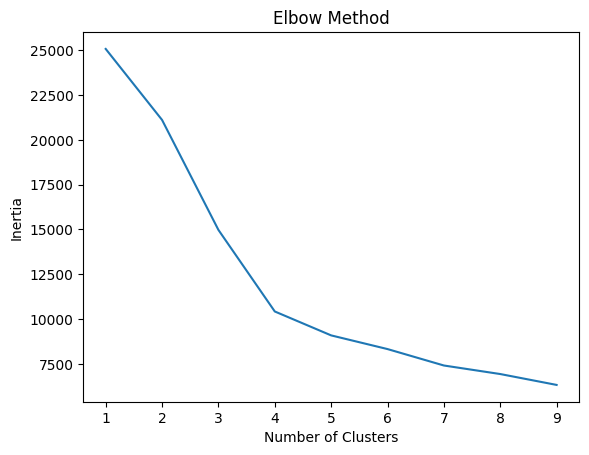

In [430]:
### identify best numbre of group
inertia = []
for k in range(1, 10):  # Trying different cluster sizes (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_player_cls)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


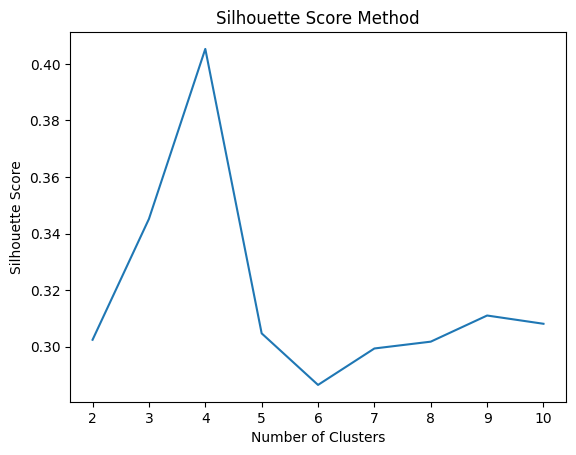

In [431]:
### identify score silhouette
silhouette_scores = []
for k in range(2, 11):  # Trying different cluster sizes (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_player_cls)
    silhouette_scores.append(silhouette_score(table_player_cls, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [432]:
### apply culter using kmeans

kmeans=KMeans(n_clusters=4 , random_state=42)

table_player_cls['cluster']=kmeans.fit_predict(table_player_cls)

In [433]:
# Group by the 'cluster' column and calculate the mean for each cluster
cluster_summary = table_player_cls.groupby('cluster').mean().reset_index()

cluster_summary.head()


,cluster,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,0,0.480076,0.460095,0.156237,0.153261,0.205433,0.169861,0.149921,0.278782,0.174043,0.542308,0.336781,0.572686,0.150367,0.305495,0.249459,0.192828,0.276459,0.248776,0.159287,0.160223,0.157429,0.753496,0.738240,0.695966,0.707520,0.757191,0.885806,1.987193,1.917823
1,1,0.468436,0.464694,0.585078,0.511462,0.615434,0.518890,0.514157,0.548493,0.630994,0.574199,0.649531,0.613643,0.555526,0.598012,0.538645,0.577878,0.560105,0.557113,0.503004,0.548937,0.491250,0.099913,0.117904,0.179870,0.111855,0.112193,0.746143,1.961976,1.830606
2,2,0.511570,0.492891,0.584695,0.482291,0.635437,0.503104,0.509867,0.586927,0.629312,0.608732,0.708294,0.671554,0.551869,0.692143,0.649920,0.576605,0.579206,0.555451,0.608450,0.661003,0.592890,0.106828,0.136331,0.239888,0.129312,0.131192,0.783159,1.266924,0.020363
3,3,0.514316,0.512207,0.664000,0.599591,0.642385,0.592737,0.567077,0.563941,0.683416,0.618529,0.696559,0.580709,0.630114,0.587161,0.495412,0.662888,0.604637,0.600871,0.444694,0.491484,0.445319,0.100732,0.113805,0.157523,0.107507,0.107301,0.709370,0.013235,1.799894


In [434]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Adjust eps and min_samples as needed
table_player_cls['clusterDB'] = dbscan.fit_predict(table_player_cls)


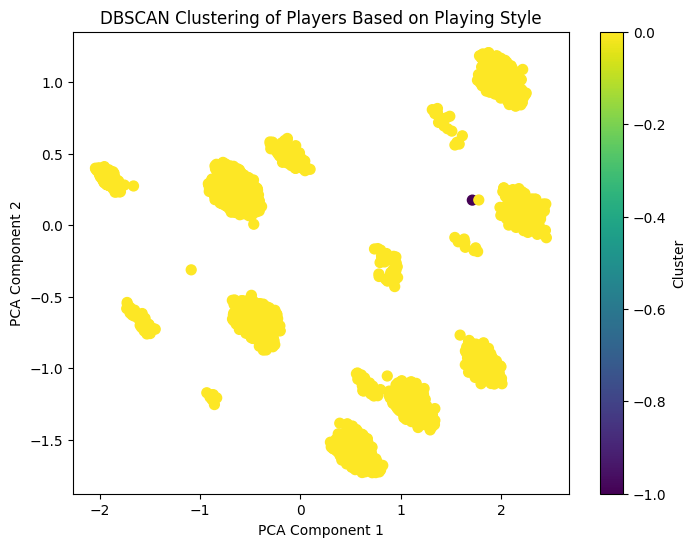

In [ ]:
# Reduce the data to 2D using PCA for visualization

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(table_player_cls)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=table_player_cls['clusterDB'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Players Based on Playing Style")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [436]:
table_player_cls

,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,cluster,clusterDB
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2625,0.348487,0.229317,0.529563,0.484757,0.542824,0.393500,0.522515,0.661311,0.577888,0.375180,0.794043,0.466472,0.605442,0.729263,0.652882,0.519699,0.539288,0.637694,0.676209,0.698758,0.577077,0.128608,0.127919,0.184403,0.093246,0.094751,1,2,2,1,0
2752,0.536282,0.438178,0.365039,0.371756,0.522845,0.191621,0.152931,0.588155,0.536727,0.537759,0.581805,0.826369,0.161565,0.838134,0.762322,0.307495,0.506702,0.318417,0.771540,0.780998,0.677785,0.113604,0.048250,0.044721,0.079166,0.147213,1,2,2,1,0
2768,0.534346,0.442484,0.434733,0.432897,0.639908,0.287363,0.167091,0.556802,0.546057,0.668377,0.560828,0.624879,0.159864,0.626152,0.800752,0.450566,0.567528,0.275961,0.778210,0.780423,0.836042,0.109853,0.163826,0.226891,0.146643,0.113488,0,2,2,1,0
2770,0.571905,0.509449,0.670209,0.718401,0.732320,0.728214,0.745398,0.718559,0.780615,0.611822,0.453475,0.559184,0.797619,0.554032,0.452437,0.678625,0.725350,0.661847,0.294163,0.380837,0.223797,0.086275,0.161021,0.279209,0.159926,0.168625,1,2,1,1,0
2790,0.552932,0.560696,0.767781,0.371429,0.678741,0.450945,0.587596,0.712869,0.666135,0.659484,0.704829,0.673469,0.433333,0.694355,0.668421,0.634529,0.593053,0.559036,0.812451,0.828502,0.716151,0.078772,0.176730,0.650101,0.162901,0.173122,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,0.181107,0.337075,0.437330,0.452301,0.577744,0.444678,0.445509,0.574537,0.535380,0.429752,0.492344,0.386518,0.386364,0.307918,0.189527,0.498369,0.495594,0.523549,0.402193,0.512736,0.497440,0.083887,0.134958,0.107228,0.105490,0.072560,0,2,2,1,0
746419,0.325254,0.339130,0.587832,0.263668,0.288718,0.290098,0.392523,0.288562,0.530142,0.525253,0.608952,0.333333,0.250000,0.580645,0.546784,0.571749,0.364956,0.409639,0.583658,0.760870,0.637822,0.067519,0.094256,0.043611,0.078103,0.078692,1,0,2,3,0
748432,0.304926,0.384348,0.503856,0.240741,0.454183,0.232653,0.166525,0.361718,0.380319,0.350168,0.440518,0.619048,0.226190,0.495968,0.570175,0.381166,0.319336,0.433735,0.677043,0.760870,0.704961,0.078772,0.070692,0.101927,0.111576,0.044967,1,2,2,1,0


In [437]:
table_team_sp=table_team_sp.drop(columns=['id' , 'date' , 'buildUpPlaySpeedClass' , 'buildUpPlayDribblingClass' , 'buildUpPlayPassingClass' , 'chanceCreationPassingClass' , 
                                          'chanceCreationCrossingClass' , 'chanceCreationShootingClass' , 'chanceCreationPositioningClass', 
                                          'team_long_name' , 'team_short_name' , 'defencePressureClass' ,'defenceAggressionClass' , 'defenceTeamWidthClass' ,  ])

In [438]:
num_col=['buildUpPlaySpeed' , 'buildUpPlayDribbling' ,'buildUpPlayPassing' , 'chanceCreationPassing' , 'chanceCreationCrossing',
          'chanceCreationShooting' , 'defencePressure' , 'defenceAggression' ,'defenceTeamWidth' ]
catg_colc=['buildUpPlayPositioningClass' ,'defenceDefenderLineClass' ]

In [439]:
# Split into numerical and categorical
numerical_df = table_team_sp[num_col]
categorical_df = table_team_sp[catg_colc]

# Aggregate separately
numerical_result = numerical_df.groupby(table_team_sp['team_api_id']).mean()
categorical_result = categorical_df.groupby(table_team_sp['team_api_id']).agg(lambda x: x.mode()[0])

# Merge results
table_team_cls= pd.concat([numerical_result, categorical_result], axis=1)


In [440]:
table_team_cls[num_col]=scaler.fit_transform(table_team_cls[num_col])
for col in catg_colc : 
    table_team_cls[col]= encoding.fit_transform(table_team_cls[col])

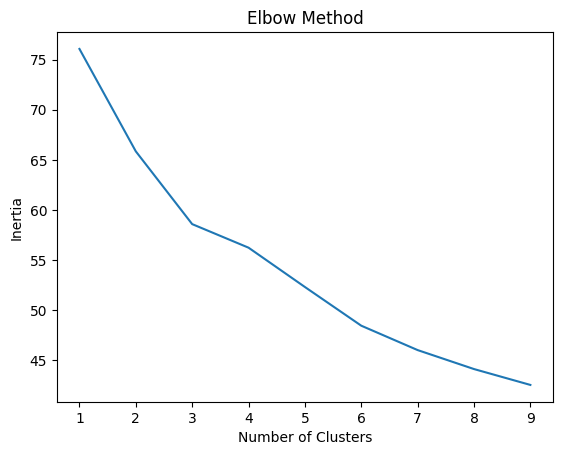

In [441]:
inertia = []
for k in range(1, 10):  # Trying different cluster sizes (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_team_cls)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

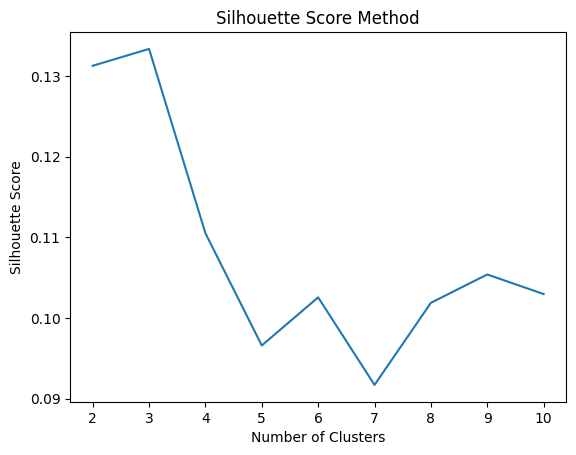

In [442]:
silhouette_scores = []
for k in range(2, 11):  # Trying different cluster sizes (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_team_cls)
    silhouette_scores.append(silhouette_score(table_team_cls, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [443]:
### apply kmean on team by 3 group
kmeans=KMeans(n_clusters=3 , random_state=42)

table_team_cls['cluster']=kmeans.fit_predict(table_team_cls)

In [444]:
original_data=table_team_cls

In [445]:
### inverse transform
original_data[num_col]=scaler.inverse_transform(table_team_cls[num_col])
for col in catg_colc : 
    original_data[col]= encoding.inverse_transform(table_team_cls[col])

In [446]:
### cluster 0
cluster_0 = original_data[original_data['cluster']==0].describe()

In [447]:
### cluster 1
cluster_1=original_data[original_data['cluster']==1].describe()

In [448]:
### cluster 2
cluster_2=original_data[original_data['cluster']==2].describe()

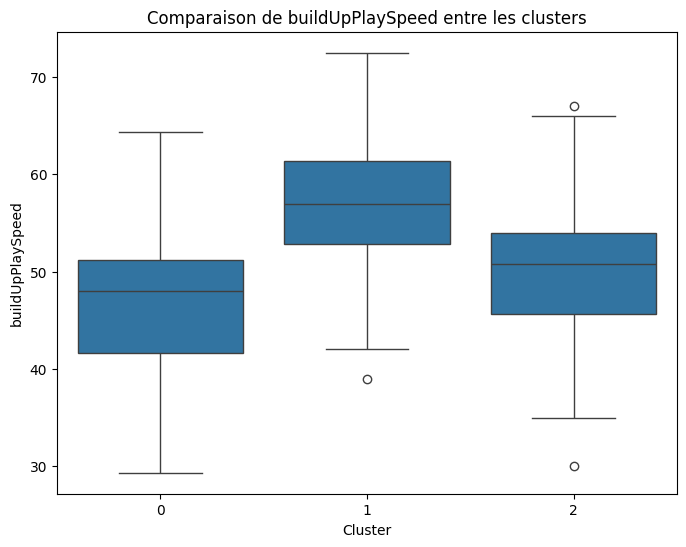

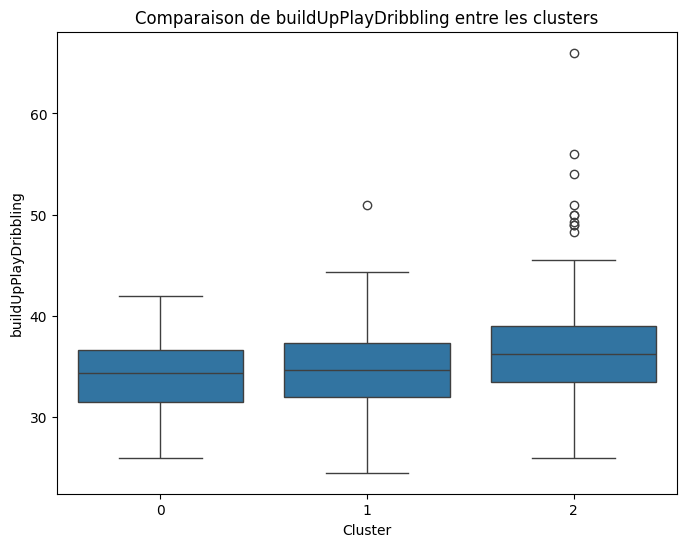

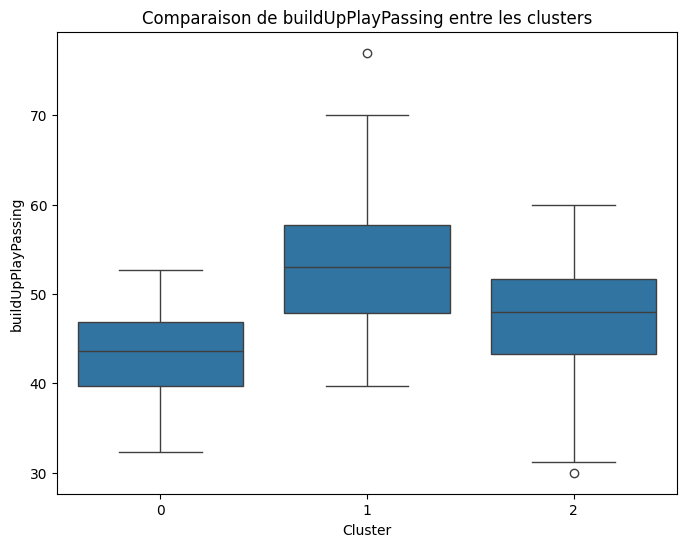

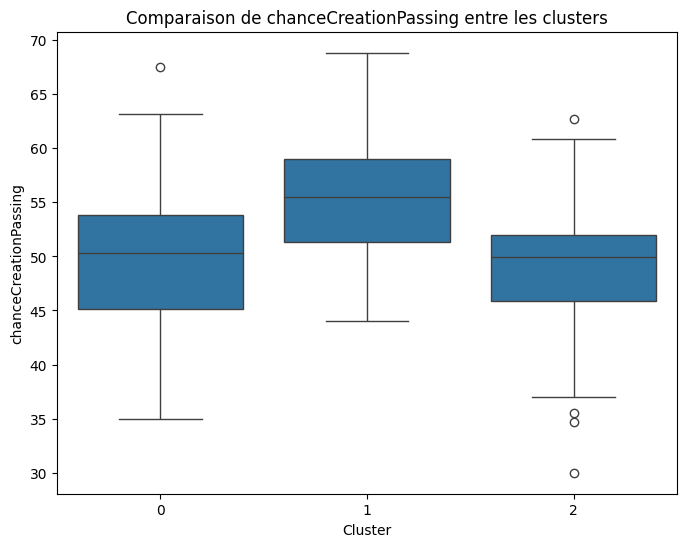

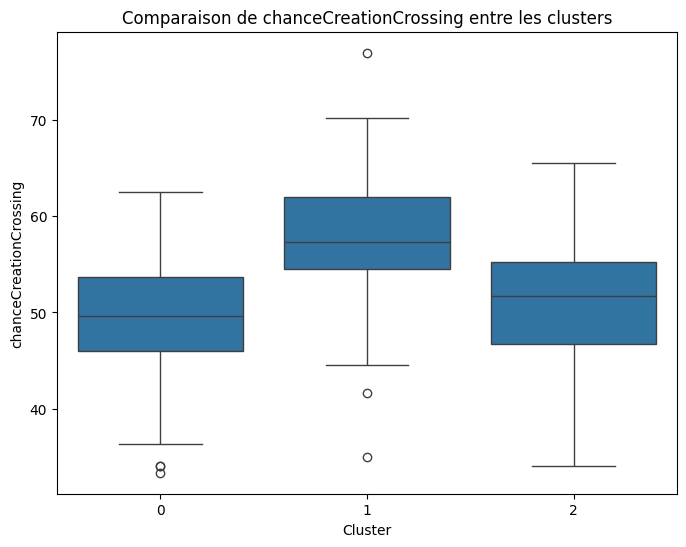

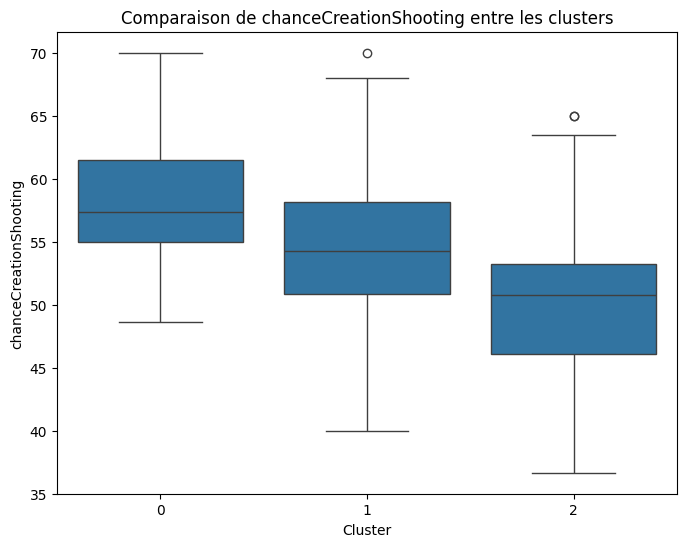

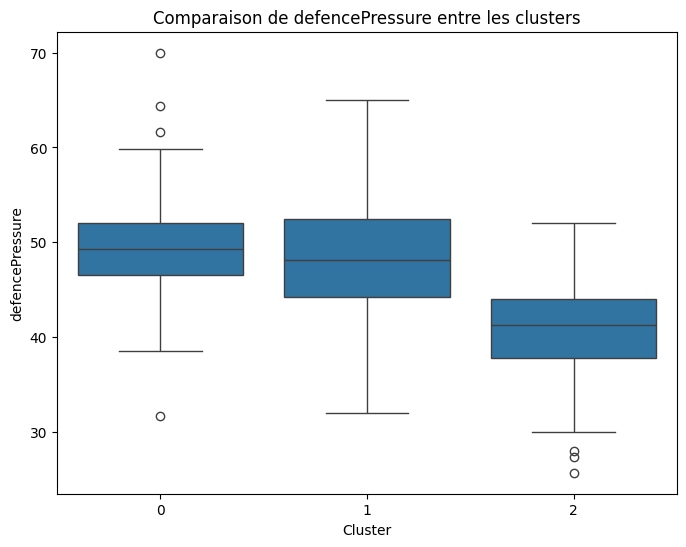

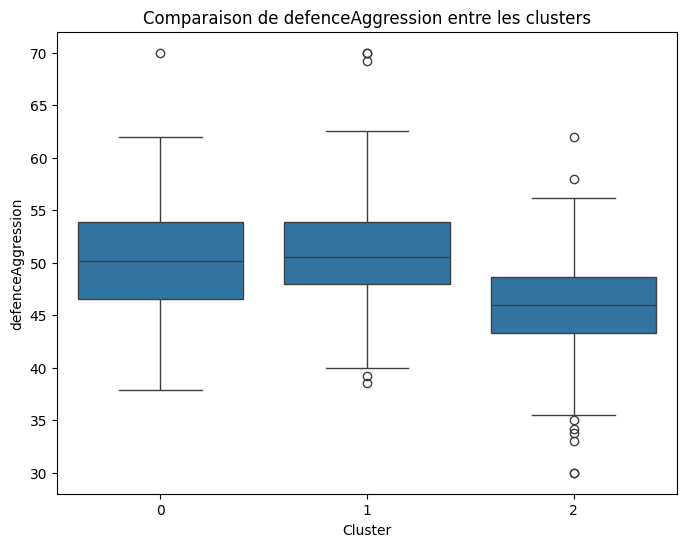

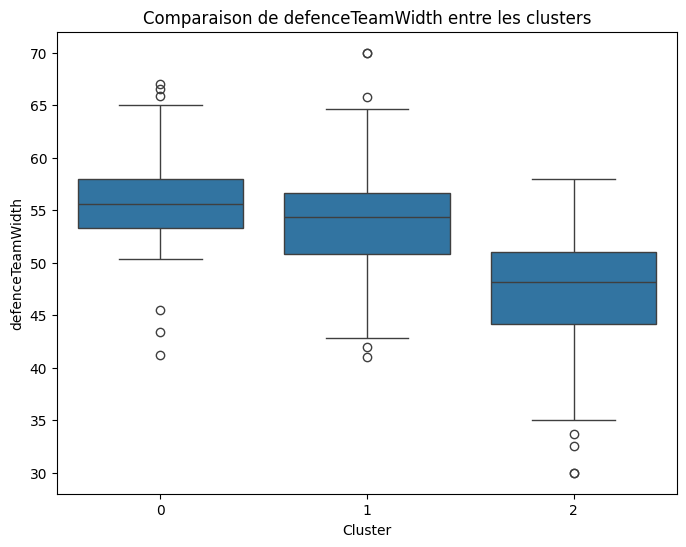

In [449]:
# List of varibale for comparaison 
variables = ['buildUpPlaySpeed' ,	'buildUpPlayDribbling',	'buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing'	,'chanceCreationShooting'	,
             'defencePressure' ,	'defenceAggression' , 	'defenceTeamWidth']	
# Générer des boxplots
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=var, data=original_data)
    plt.title(f"Comparaison de {var} entre les clusters")
    plt.xlabel("Cluster")
    plt.ylabel(var)
    plt.show()

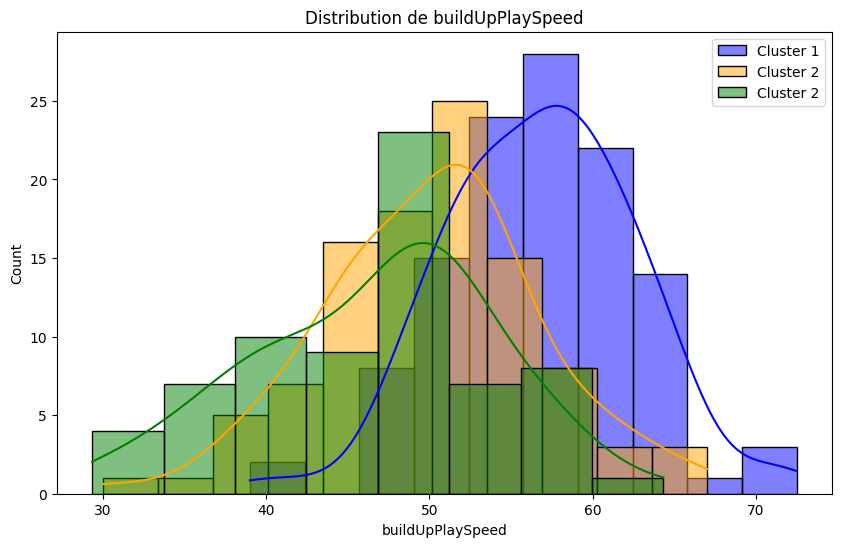

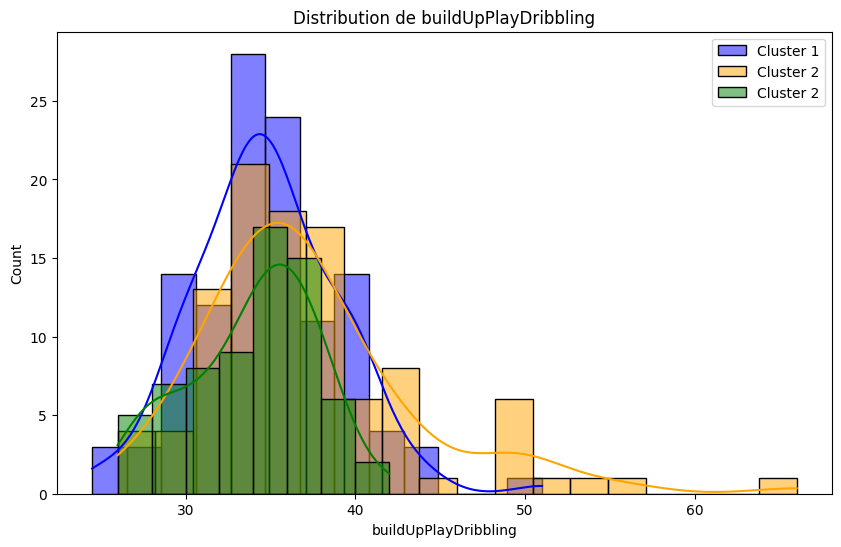

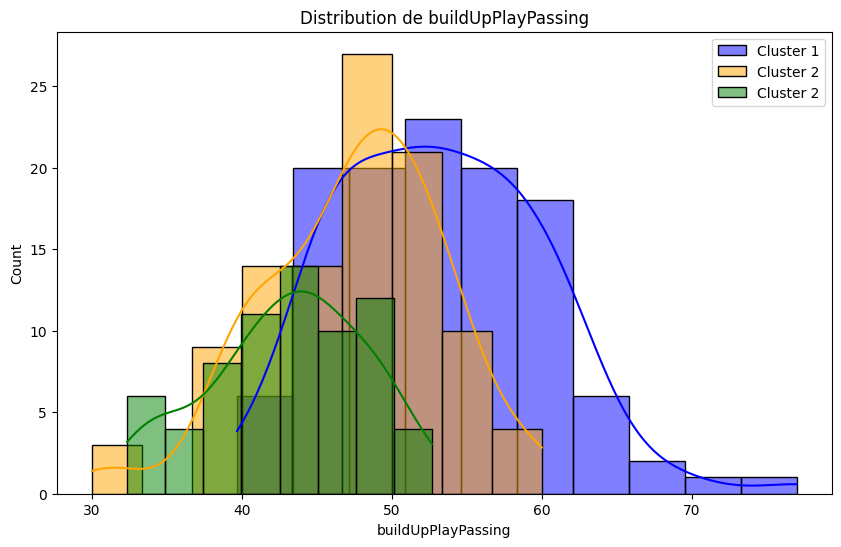

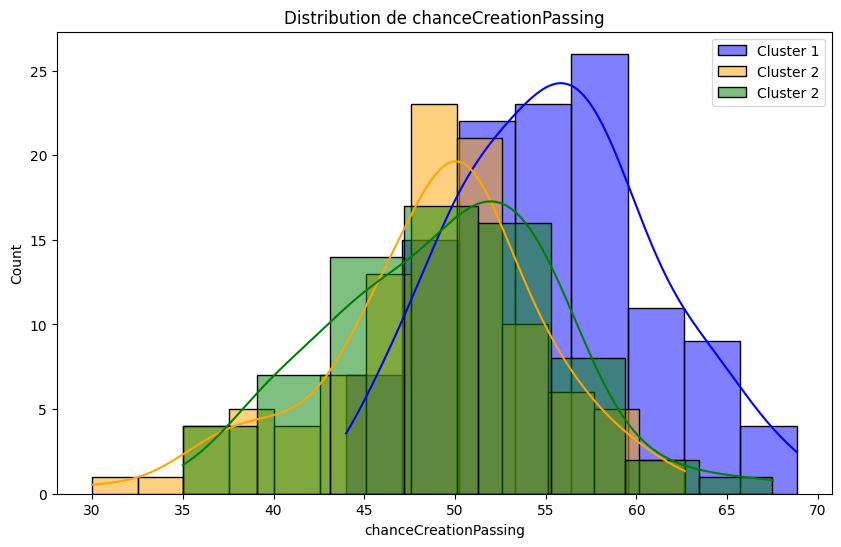

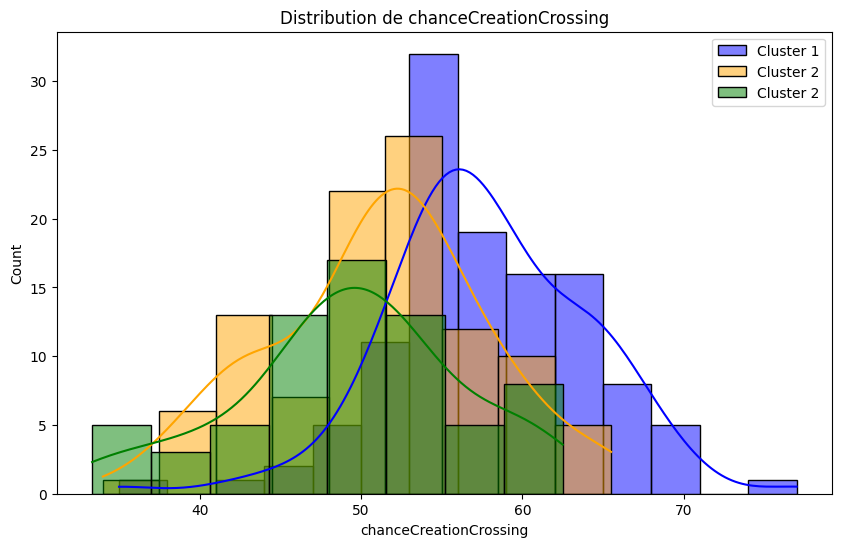

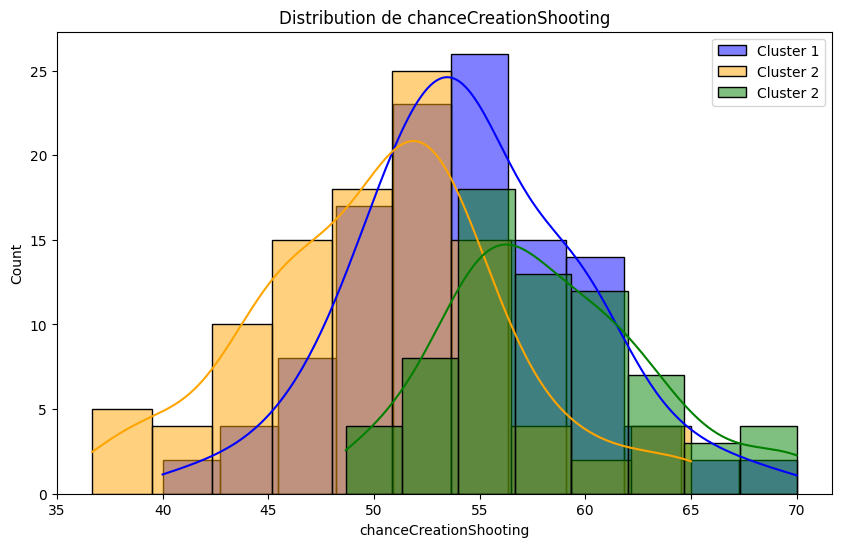

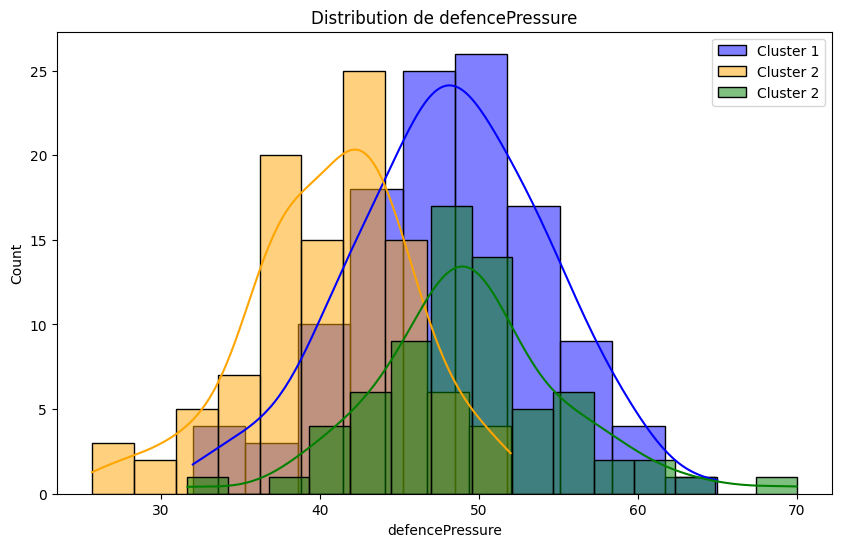

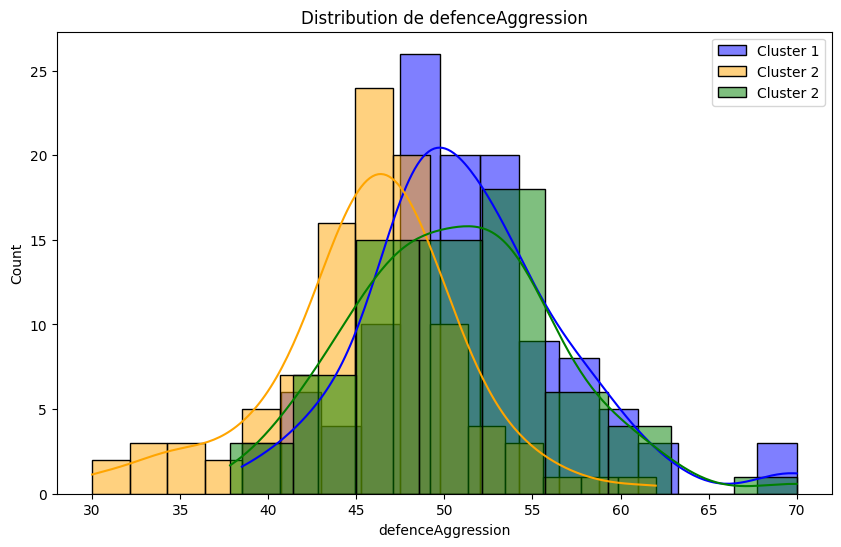

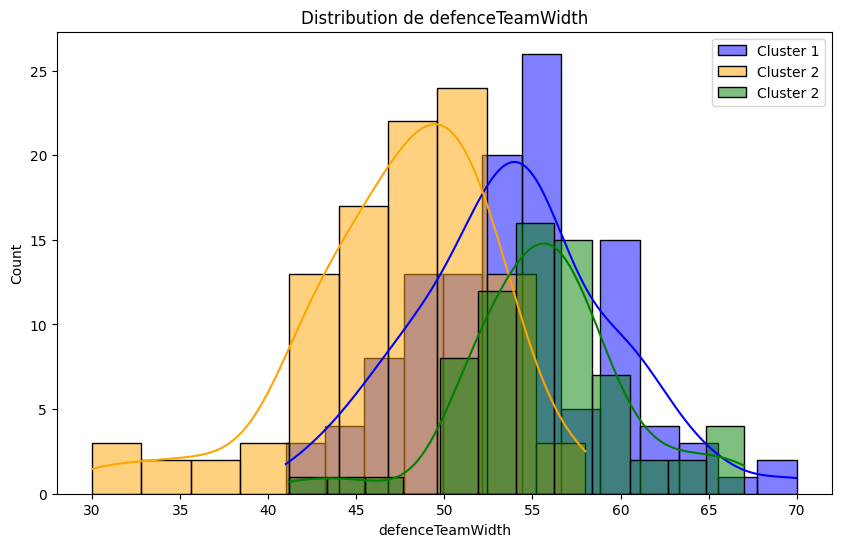

In [450]:
# Distribution of varibale for each cluster 
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[original_data['cluster'] == 1][var], color='blue', kde=True, label="Cluster 1")
    sns.histplot(original_data[original_data['cluster'] == 2][var], color='orange', kde=True, label="Cluster 2")
    sns.histplot(original_data[original_data['cluster'] == 0][var], color='green', kde=True, label="Cluster 2")

    plt.title(f"Distribution de {var}")
    plt.legend()
    plt.show()
